# Cloud Inpainting on SEN3 Data
This notebook is a quick test to load, mask with clouds and then try and recover the data hidden by clouds using an inpainting DL model

In [1]:
import utils.prepare_dataset as predat
import matplotlib.pyplot as plt
import numpy as np


In [2]:
ds,dsc = predat.prepare_dataset(low_bound=0, high_bound=15, num_clouds=1000, num_samples=1000)

There are 17875 cloud masks in the directory
There are 5996 cloud masks between 0 and 15 percent of coverage
Cloud masks loaded
There are 15794 batches with no clouds
SEN3 files selected
SEN3 files loaded
Masking images...
Images masked


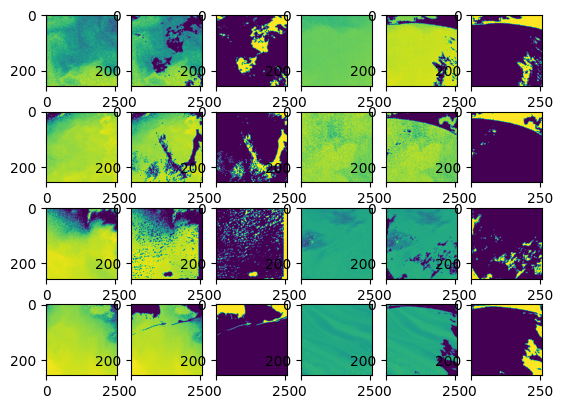

In [3]:
for i in range(1,9):
    plt.subplot(4,6,3*i-2)
    plt.imshow(ds["Oa01_reflectance"][i])
    plt.subplot(4,6,3*i-1)
    plt.imshow(dsc["Oa01_reflectance"][i])
    plt.subplot(4,6,3*i)
    plt.imshow(dsc["mask"][i])

## Extracting the bands from the Xarrays

The goal here is to convert the data into a more tensorflow friendly data format

In [4]:
dsnp = np.ndarray((256,256,11,1000))
dsnp_c = np.ndarray((256,256,12,1000))
for i in range(1,12):
    dsnp[:,:,i-1,:] = np.moveaxis(ds["Oa"+str(i).zfill(2)+"_reflectance"].values,0,2)
    dsnp_c[:,:,i-1,:] = np.moveaxis(dsc["Oa"+str(i).zfill(2)+"_reflectance"].values,0,2)
dsnp_c[:,:,11,:] = np.moveaxis(dsc["mask"].values,0,2)

np.save('Ground_truth2.npy', dsnp)
np.save('Cloudy_DS2.npy', dsnp_c)

In [5]:
np.max(dsnp[:,:,:,0])
np.max(dsnp_c[:,:,:,0])
dsc.isnull().any()

<xarray.Dataset> Size: 12B
Dimensions:           ()
Data variables:
    Oa01_reflectance  bool 1B False
    Oa02_reflectance  bool 1B False
    Oa03_reflectance  bool 1B False
    Oa04_reflectance  bool 1B False
    Oa05_reflectance  bool 1B False
    Oa06_reflectance  bool 1B False
    Oa07_reflectance  bool 1B False
    Oa08_reflectance  bool 1B False
    Oa09_reflectance  bool 1B False
    Oa10_reflectance  bool 1B False
    Oa11_reflectance  bool 1B False
    mask              bool 1B False